In [2]:
from IPython import display

`source /home/czhao/My_project/DM_CHIA_PET/bin/source.bash`

###  1. Experiment design

Micro-C, in which micrococcal nuclease is used instead of restriction enzymes to fragment chromatin, enabling nucleosome resolution chromosome folding maps.‘‘Micro-C’’ for micrococcal nuclease chromosome conformation assay—in which chromatin fragmentation is achieved by MNase digestion, yielding mononucleosomes. This protocol is based on the CHiA-pet protocol with key alterations being the MNase digestion step.After purification of ligation products between mononucleosomes, paired-end deep sequencing is used to characterize the ligation products.

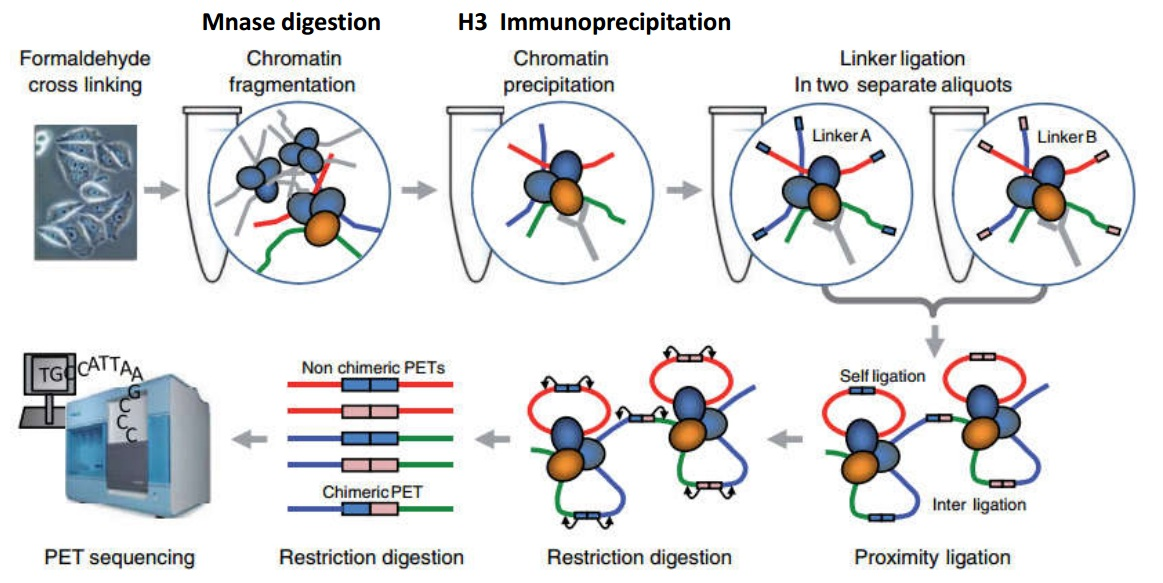

In [3]:
display.Image("notebook_material/Experiment_design.jpg")

###  2. Analysis pipeline

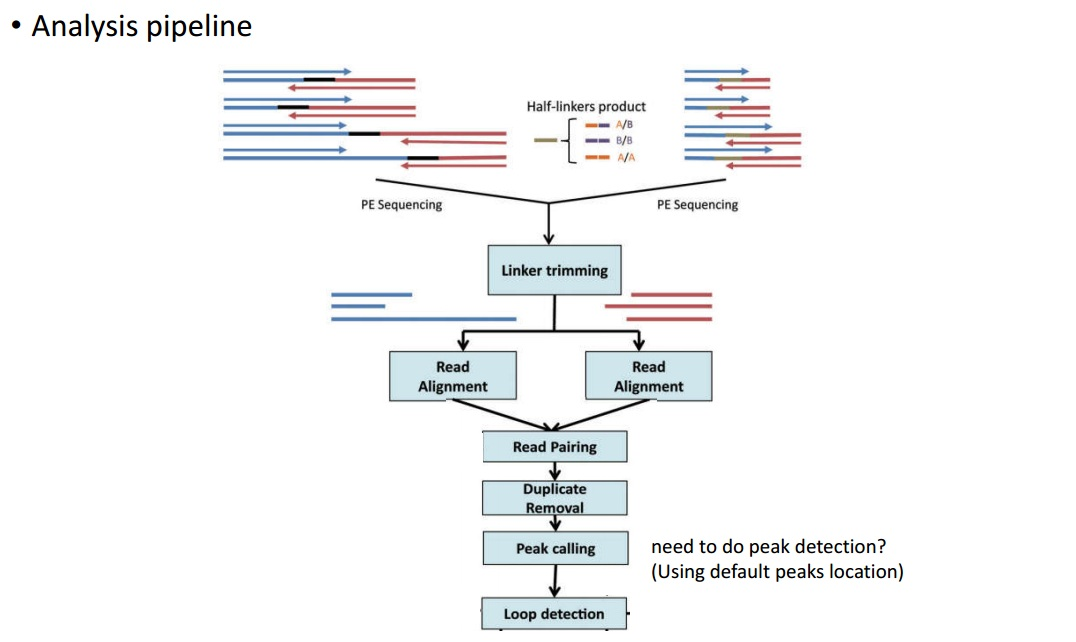

In [4]:
display.Image("notebook_material/Analysis_pipeline.jpg")

#### 2.1 Linker trimming



Reads composing:

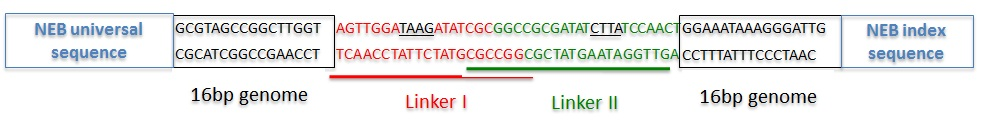

In [6]:
display.Image("notebook_material/PETs_reads_composing.jpg.jpg")

 `qsub $BIN/Linker_trimming.bash` 
 
**Note**:
 
 1.cutadapt:"GATCGGAAGAG"
 
 2.trimLinker: -e 1  -t 14 -o trimL -m 0 -n withCut -k 0 -A AGTTGGATAAGATATCGCGG  -B AGTTGGAATGTATATCGCGG     ## -e: mismatch -m: mode(A/B linkers)
 

#### 2.2 PETs mapping

`qsub $BIN/PETs_mapping_pairing.bash`

**Notes**:

1. bowtie mapping:  -m1 -v 1  -S -q |samtools view -Sq 1 -  ##  unique mapping and allowing 1 mismatch

2. removeDup: remove duplicated reads




#### 2.3 Peak calling and Loop calling

`qsub $BIN/Peak_calling.bash`

`qsub $BIN/Interaction_calling.bash`

**Note**: Definition of different PETS([Fullwood et al., 2009](https://www.ncbi.nlm.nih.gov/pubmed/19890323):PET classification. Based on mapping characteristics, each of the uniquely aligned PET sequences can be classified by whether it was derived from one DNA fragment or two DNA fragments.

+ “self-ligation PET” 
+ “inter-ligation PETs”: 


In [6]:
display.IFrame('notebook_material/Ways_of_PETs_mapping.pdf',width=800,height=800)

**Note**: According the mapping position of PETs , there are four type of PETs. However, only one type of PETs could be generated by self-ligation. The amount of four type PETs from inter-ligation should be same. I used the **FDR=(Total-4*Aver)/Total** to determine the right distance cutoff of inter-ligation. 1200bp were fine.

To be continued...